# Stock Pricing Model 

#Monte Carlo Simulations: helps us to predict the most likely outcome using computer simulations rather than physical testing.


### Stock Price Prediction

In [3]:
import os
print(os.getcwd())
os.chdir('C:/Users/tushi/Downloads')
print(os.listdir())

C:\Users\tushi
['.ipynb_checkpoints', '.RData', '.Rhistory', '1-3.JPG', '1.JPG', '10.JPG', '11.JPG', '12.JPG', '13.JPG', '14.JPEG', '14025WhistlingTealDriveCharlotteNC28262-SMALL (1).zip', '14025WhistlingTealDriveCharlotteNC28262-SMALL.zip', '15.JPG', '1520180788114.jpg', '16.JPG', '17.JPG', '1714247440.236497.jpg', '18.JPG', '1811c57f-f992-4054-8b95-78b5c7737592.jpg', '19.JPG', '2.JPG', '20.JPG', '2023 Annual Report on Form 10-K.pdf', '2023 D-400 Web-Fill Version.pdf', '2024 D-400 Handwritten Version.pdf', '2024 Spring Syllabus ACCT 2122 Roland 1 8 24.docx', '21.JPG', '22.JPG', '23.JPG', '24.JPG', '25.JPG', '264050425.zip', '266750811.zip', '271763714 (1).zip', '271763714.zip', '274167004 (1).zip', '274167004.zip', '275782498 (1).zip', '275782498.zip', '281612091.zip', '281849884.zip', '294553335.zip', '3.JPG', '4.JPG', '5.JPG', '6.JPG', '6636bd12-53fe-4d9c-8772-58ac718b6667.jpeg', '7.JPG', '7109BentzStreetCharlotteNC28269-SMALL.zip', '8.JPG', '86C11F38-FA39-40A0-9013-9ED4379832A8 (1)

In [6]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [7]:
##graph the closing price of the stock over 1000 days.


import pandas as pd
import altair as alt

# Read the CSV file into a DataFrame
df = pd.read_csv("AAPL_train.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Create the Altair chart
chart = alt.Chart(df).mark_line().encode(
    x='Date:T',
    y='Close:Q'
).properties(
    width=800,
    height=400
).interactive()

# Show the chart
chart

alt.Chart(...)

In [8]:
###let’s look at how much the stock changes from day to day. To do this we will make a new list of numbers where we take the price from day N and subtract the price from day N-1.

df['Daily Change'] = df['Close'].diff()

# Create Altair chart for daily changes
chart_daily_change = alt.Chart(df).mark_line().encode(
    x='Date:T',
    y='Daily Change:Q'
).properties(
    width=800,
    height=400
).interactive()

# Show the chart
chart_daily_change

alt.Chart(...)

In [9]:
##Histogram of the daily changes in stock prices. It is also bell shaped.

import altair as alt

# Create a histogram of the daily changes
histogram = alt.Chart(df).mark_bar().encode(
    alt.X('Daily Change:Q', bin=alt.Bin(maxbins=30)),
    alt.Y('count()')
).properties(
    width=600,
    height=400
)

# Display the histogram
histogram

alt.Chart(...)

In [10]:
##Computing mean and standard deviation from the above data 
mean_change = df['Daily Change'].mean()
std_deviation = df['Daily Change'].std()

print("Mean Change:", mean_change)
print("Standard Deviation of Changes:", std_deviation)

Mean Change: 0.0626264399363564
Standard Deviation of Changes: 2.0962240176150386


In [11]:
##Making predictions for the  next 250 days using the random module 

import random

# Closing price of the last day as the starting point
starting_price = df['Close'].iloc[-1]

# Predict next 250 days
predictions = []
current_price = starting_price
for _ in range(250):
    # Generate a random change using random.gauss() based on mean and standard deviation
    random_change = random.gauss(mean_change, std_deviation)
    # Update the current price by adding the random change
    current_price += random_change
    # Append the predicted price to the list of predictions
    predictions.append(current_price)

# Print the first few predictions
print("First few predictions for the next 10 days:")
for i in range(10):
    print("Day {}: {:.2f}".format(i+1, predictions[i]))



First few predictions for the next 10 days:
Day 1: 156.43
Day 2: 154.97
Day 3: 152.48
Day 4: 152.88
Day 5: 150.61
Day 6: 149.71
Day 7: 150.47
Day 8: 149.05
Day 9: 144.76
Day 10: 141.36


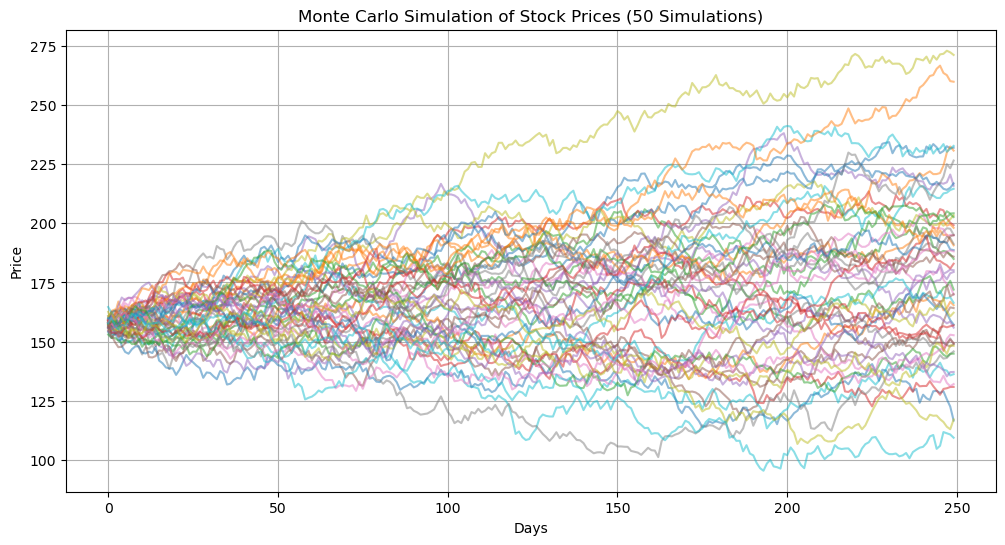

In [12]:
import random
import matplotlib.pyplot as plt

# Closing price of the last day as the starting point
starting_price = df['Close'].iloc[-1]

# Number of simulations and days
num_simulations = 50
days = 250

plt.figure(figsize=(12, 6))

for _ in range(num_simulations):
    predictions = []
    current_price = starting_price
    for _ in range(days):
        random_change = random.gauss(mean_change, std_deviation)
        current_price += random_change
        predictions.append(current_price)
    plt.plot(predictions, alpha=0.5)  # plot each path

# Add labels and formatting
plt.title("Monte Carlo Simulation of Stock Prices ({} Simulations)".format(num_simulations))
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()
